In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import csv
import seaborn
import numpy
import warnings
warnings.filterwarnings('ignore')
from scipy import stats

from IPython.display import display
import seaborn as sns


In [73]:
#Create reference to CSV file
csv_path_people = "Resources/Traffic_Crashes_-_People.csv"

#Impor the CSV into a pandas DataFrame
df1 = pd.read_csv(csv_path_people, low_memory=False) 

#Create reference to CSV file for second file
csv_path_crashes = "Resources/Traffic_Crashes_-_Crashes.csv"

df2 = pd.read_csv(csv_path_crashes, low_memory=False)

#Create reference to CSV file for 3rd file
csv_path_vehicles = "Resources/Traffic_Crashes_-_Vehicles.csv"

df3 = pd.read_csv(csv_path_vehicles, low_memory=False)

df1 = df1[['RD_NO', 'PERSON_ID', 'PERSON_TYPE', 'VEHICLE_ID', 'CRASH_DATE',
       'SEAT_NO', 'CITY', 'STATE', 'ZIPCODE', 'SEX', 'AGE',
       'DRIVERS_LICENSE_STATE', 'DRIVERS_LICENSE_CLASS', 'SAFETY_EQUIPMENT',
       'AIRBAG_DEPLOYED', 'EJECTION', 'INJURY_CLASSIFICATION', 'HOSPITAL',
       'EMS_AGENCY', 'EMS_RUN_NO', 'DRIVER_ACTION', 'DRIVER_VISION',
       'PHYSICAL_CONDITION', 'PEDPEDAL_ACTION', 'PEDPEDAL_VISIBILITY',
       'PEDPEDAL_LOCATION', 'BAC_RESULT', 'BAC_RESULT VALUE',
       'CELL_PHONE_USE']]
df1.head()

df3 = df3[['RD_NO', 'CRASH_UNIT_ID', 'CRASH_DATE', 'UNIT_NO', 'UNIT_TYPE',
       'NUM_PASSENGERS', 'VEHICLE_ID', 'CMRC_VEH_I', 'MAKE', 'MODEL',
       'LIC_PLATE_STATE', 'VEHICLE_YEAR', 'VEHICLE_DEFECT', 'VEHICLE_TYPE',
       'VEHICLE_USE', 'TRAVEL_DIRECTION', 'MANEUVER', 'TOWED_I', 'FIRE_I',
       'OCCUPANT_CNT', 'EXCEED_SPEED_LIMIT_I', 'FIRST_CONTACT_POINT']]
df3.head()

#Merge df1 and df2 with the RD_NO unique identifier
new_df1 = pd.merge(df1, df2, on="RD_NO")


#Merge new_df1 and df3 with the RD_NO unique identifier
traffic_df = pd.merge(new_df1, df3, on="RD_NO")

question_1_df = traffic_df[['RD_NO', 'PERSON_ID', 'PERSON_TYPE', 'CRASH_DATE_x', 'CITY', 'STATE', 'ZIPCODE', 'SEX', 'AGE',
       'DRIVERS_LICENSE_STATE', 'PHYSICAL_CONDITION', 'CELL_PHONE_USE', 'CRASH_DATE_y',
       'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
       'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION',
       'INJURIES_UNKNOWN', 'LATITUDE', 'LONGITUDE', 'LOCATION', 'CRASH_DATE']]

question_1_df
pd.options.display.max_columns = None
question_1_df['PHYSICAL_CONDITION'].value_counts()

In [79]:
traffic_df


,RD_NO,PERSON_ID,PERSON_TYPE,VEHICLE_ID_x,CRASH_DATE_x,SEAT_NO,CITY,STATE,ZIPCODE,SEX,AGE,DRIVERS_LICENSE_STATE,DRIVERS_LICENSE_CLASS,SAFETY_EQUIPMENT,AIRBAG_DEPLOYED,EJECTION,INJURY_CLASSIFICATION,HOSPITAL,EMS_AGENCY,EMS_RUN_NO,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,PEDPEDAL_ACTION,PEDPEDAL_VISIBILITY,PEDPEDAL_LOCATION,BAC_RESULT,BAC_RESULT VALUE,CELL_PHONE_USE,CRASH_DATE_EST_I,CRASH_DATE_y,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,LANE_CNT,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,REPORT_TYPE,CRASH_TYPE,INTERSECTION_RELATED_I,NOT_RIGHT_OF_WAY_I,HIT_AND_RUN_I,DAMAGE,DATE_POLICE_NOTIFIED,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,STREET_NO,STREET_DIRECTION,STREET_NAME,BEAT_OF_OCCURRENCE,PHOTOS_TAKEN_I,STATEMENTS_TAKEN_I,DOORING_I,WORK_ZONE_I,WORK_ZONE_TYPE,WORKERS_PRESENT_I,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION,CRASH_UNIT_ID,CRASH_DATE,UNIT_NO,UNIT_TYPE,NUM_PASSENGERS,VEHICLE_ID_y,CMRC_VEH_I,MAKE,MODEL,LIC_PLATE_STATE,VEHICLE_YEAR,VEHICLE_DEFECT,VEHICLE_TYPE,VEHICLE_USE,TRAVEL_DIRECTION,MANEUVER,TOWED_I,FIRE_I,OCCUPANT_CNT,EXCEED_SPEED_LIMIT_I,FIRST_CONTACT_POINT
0,HY368708,O10,DRIVER,10.0,08/04/2015 12:40:00 PM,NaN,CHICAGO,IL,60641,M,NaN,NaN,NaN,USAGE UNKNOWN,NOT APPLICABLE,NONE,NO INDICATION OF INJURY,NaN,NaN,NaN,FAILED TO YIELD,UNKNOWN,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN,NaN,08/04/2015 12:40:00 PM,35,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,2,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,Y,NaN,NaN,"$501 - $1,500",08/04/2015 01:05:00 PM,UNABLE TO DETERMINE,UNABLE TO DETERMINE,1111,W,DIVISION ST,1822.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0.0,12,3,8,41.903416,-87.656037,POINT (-87.65603711678 41.903416088848),10,08/04/2015 12:40:00 PM,1,DRIVER,NaN,10.0,NaN,FORD,Focus,IL,2001.0,NONE,PASSENGER,PERSONAL,N,TURNING LEFT,NaN,NaN,1.0,NaN,FRONT
1,HY368708,O10,DRIVER,10.0,08/04/2015 12:40:00 PM,NaN,CHICAGO,IL,60641,M,NaN,NaN,NaN,USAGE UNKNOWN,NOT APPLICABLE,NONE,NO INDICATION OF INJURY,NaN,NaN,NaN,FAILED TO YIELD,UNKNOWN,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN,NaN,08/04/2015 12:40:00 PM,35,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,2,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,Y,NaN,NaN,"$501 - $1,500",08/04/2015 01:05:00 PM,UNABLE TO DETERMINE,UNABLE TO DETERMINE,1111,W,DIVISION ST,1822.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0.0,12,3,8,41.903416,-87.656037,POINT (-87.65603711678 41.903416088848),11,08/04/2015 12:40:00 PM,2,DRIVER,NaN,11.0,NaN,CHEVROLET,EQUINOX,IL,2013.0,NONE,SPORT UTILITY VEHICLE (SUV),PERSONAL,W,STRAIGHT AHEAD,NaN,NaN,1.0,NaN,FRONT-LEFT
2,HY368708,O11,DRIVER,11.0,08/04/2015 12:40:00 PM,NaN,ORLAND PARK,IL,60462,M,34.0,IL,D,SAFETY BELT USED,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,NaN,NaN,NaN,NONE,NOT OBSCURED,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN,NaN,08/04/2015 12:40:00 PM,35,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,2,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,Y,NaN,NaN,"$501 - $1,500",08/04/2015 01:05:00 PM,UNABLE TO DETERMINE,UNABLE TO DETERMINE,1111,W,DIVISION ST,1822.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0.0,12,3,8,41.903416,-87.656037,POINT (-87.65603711678 41.903416088848),10,08/04/2015 12:40:00 PM,1,DRIVER,NaN,10.0,NaN,FORD,Focus,IL,2001.0,NONE,PASSENGER,PERSONAL,N,TURNING LEFT,NaN,NaN,1.0,NaN,FRONT
3,HY368708,O11,DRIVER,11.0,08/04/2015 12:40:00 PM,NaN,ORLAND PARK,IL,60462,M,34.0,IL,D,SAFETY BELT USED,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,NaN,NaN,NaN,NONE,NOT

In [74]:
#dropna values in dataframe
question_1_df['AGE'].replace(to_replace = 'NaN', value= "0.0" )

question_1_df['AGE'].dropna()
# all accident rates trends across the year

#Seperate datetime with just the date itself
question_1_df["Date"] = pd.to_datetime(question_1_df["CRASH_DATE_x"]).dt.date

#Create a column with just the year
question_1_df["YEAR"] = question_1_df["Date"].map(lambda x: x.year)

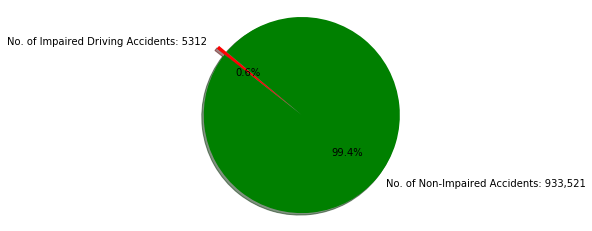

In [67]:
#question 1a: impaired driving accidents vs. all accidents pie chart 
impaired_driving = question_1_df[question_1_df.PHYSICAL_CONDITION.isin(['IMPAIRED - ALCOHOL', 'HAD BEEN DRINKING',
                                       'IMPAIRED-DRUGS', 'MEDICATED'])]
all_accidents = question_1_df[question_1_df.PHYSICAL_CONDITION.isin(['NORMAL', 'UNKNOWN', 'REMOVED BY EMS', 
                                                                 'OTHER', 'FATIGUED/ASLEEP', 'EMOTIONAL'])]
impaired_driving['RD_NO'].count()
#5312 accidents 

all_accidents['RD_NO'].count()
#933521 accidents 

labels = 'No. of Impaired Driving Accidents: 5312 ', 'No. of Non-Impaired Accidents: 933,521'
sizes = [5312, 933521]
colors = ['red', 'green']
explode = (.1, 0)  # explode 1st slice

# Plot
#plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

#plt.axis('equal')
#plt.show()

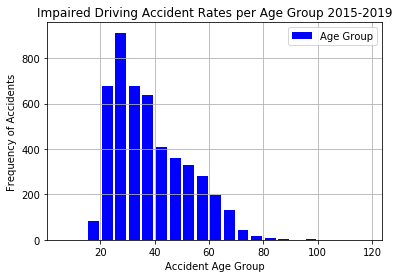

In [75]:
# question 1b Impaired Accident trends among age groups 

#impaired driving vs. age 
impaired_driving_age = impaired_driving['AGE']

bins = [5, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 120 ]


plt.hist(impaired_driving_age, bins, histtype = 'bar', rwidth = .8, color = 'b', label = "Age Group")


plt.xlabel("Accident Age Group")
plt.ylabel("Frequency of Accidents")
plt.title("Impaired Driving Accident Rates per Age Group 2015-2019")
plt.legend (loc = 'best')

#create labels for each bar. Check back on matplotlib lessons 
plt.grid()
plt.show()

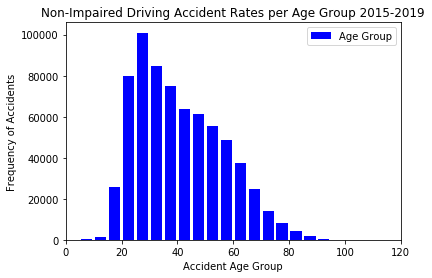

In [76]:
# question 1b Non-Impaired Accident trends among age groups 

all_accidents_age = all_accidents['AGE']

bins = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
plt.hist(all_accidents_age, bins, histtype = 'bar', rwidth = .8, color = 'b', label = "Age Group")

plt.xlabel("Accident Age Group")
plt.ylabel("Frequency of Accidents")
plt.title("Non-Impaired Driving Accident Rates per Age Group 2015-2019")
plt.legend (loc = 'best')
plt.xlim(0, 120)  
#create labels for each bar. Check back on matplotlib lessons 
#
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

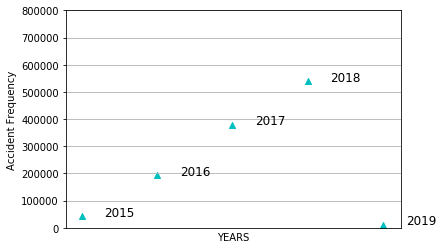

In [77]:
#Question 1c: Accident tends over the years
accidents_2015 = question_1_df[question_1_df.YEAR.isin(['2015'])]
accidents_2016 = question_1_df[question_1_df.YEAR.isin(['2016'])]
accidents_2017 = question_1_df[question_1_df.YEAR.isin(['2017'])]
accidents_2018 = question_1_df[question_1_df.YEAR.isin(['2018'])]
accidents_2019 = question_1_df[question_1_df.YEAR.isin(['2019'])]

#used the .describe function to find the Person ID count to determine the total amount of accident incidences per year
#2015: 42,091 2016: 194717 2017: 379,841, 2018: 539360, 2019: 11,690

types = ['2015', '2016', '2017', '2018', '2019']

x_axis = [1,2,3,4,5]
y_axis = [42091, 194717, 379841, 539360, 11690]


for i,type in enumerate(types):
    x = x_axis[i]
    y = y_axis[i]
    plt.scatter(x, y, marker='^', color='c')
    plt.text(x+0.3, y+0.3, type, fontsize=12)

   
plt.xlabel('YEARS')
plt.ylabel('Accident Frequency')
plt.xticks([])
plt.ylim(0, 800000)    
plt.grid()
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

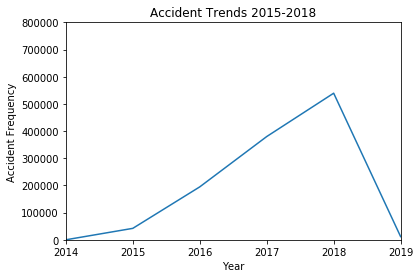

In [78]:
question_1_df['YEAR'] = question_1_df['YEAR'].astype(str)
question_1_df.groupby('YEAR').count()['RD_NO'].plot()
plt.xlabel('Year')
plt.ylabel('Accident Frequency')
plt.title('Accident Trends 2015-2018')
plt.ylim(0, 800000)    

plt.show